In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/nlp/lenta.csv', usecols=['title', 'text', 'class'])
df.head()

,title,text,class
0,Российскому спорту предрекли новый триллер пер...,Четырехкратный олимпийский чемпион и кандидат ...,Спорт
1,На Урале оперативники пошли под суд за раскрыт...,Трое курганских полицейских предстанут перед с...,Силовые структуры
2,Николя Гескьеру снова удалось сохранить работу,"Дизайнер Николя Гескьер, креативный директор ж...",Ценности
3,Украинцы похвастались попаданием по танку из а...,Бойцы Вооруженных сил Украины во время испытан...,Бывший СССР
4,Бывшего мэра Ялты и члена ОПГ «Греки» Андрея Р...,Басманный суд Москвы арестовал до 21 июля бывш...,Силовые структуры


In [3]:
df['class'].value_counts()

Россия               82
Экономика            62
Интернет и СМИ       54
Мир                  53
Спорт                52
Из жизни             46
Бывший СССР          38
Наука и техника      38
Силовые структуры    35
Культура             35
Ценности             24
Путешествия          19
Name: class, dtype: int64

In [4]:
import re
regex = re.compile('[А-яа-я]+')

def words_only(text, regex=regex):
    return ' '.join(regex.findall(text))

df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

###### Результат

In [5]:
df.text.iloc[0]

'четырехкратный олимпийский чемпион и кандидат в президенты олимпийского комитета россии окр александр попов опасается что российский спорт ожидают новые допинг разбирательства из за утечки базы данных московской антидопинговой лаборатории это начало третьей серии триллера заявил он'

###### Удаление стоп-слов

In [6]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']
def remove_stopwords(text, mystopwords=mystopwords):
    try:
        return ' '.join([token for token in text.split() if not token in mystopwords])
    except:
        return ''

df.text = df.text.apply(remove_stopwords)
df.text

0      четырехкратный олимпийский чемпион кандидат пр...
1      трое курганских полицейских предстанут судом р...
2      дизайнер николя гескьер креативный директор же...
3      бойцы вооруженных сил украины время испытаний ...
4      басманный суд москвы арестовал июля бывшего мэ...
                             ...                        
533    татарстане летняя женщина погибла травм получе...
534    председатель кндр ким чен ын время встречи гла...
535    совет федерации одобрил законопроект который н...
536    актер музыкант джонни депп приехавший россию р...
537    пользователи сети обратили внимание фотографию...
Name: text, Length: 538, dtype: object

###### Лемматизация - приведение слова к нормальной форме

In [7]:
# from pymystem3 import Mystem
# text = "Красивая мама красиво мыла раму"
# m = Mystem()
# lemmas = m.lemmatize(text.strip())
# print(''.join(lemmas))

In [8]:
%%time
# Unworked shit
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return ''.join(m.lemmatize(text)).strip()
    except:
        return ' '

##### Alternative way

# import nltk

# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df.text = df.text.apply(lemmatize)

CPU times: total: 46 s
Wall time: 11min 58s


In [9]:
df.text

0      четырехкратный олимпийский чемпион кандидат пр...
1      трое курганский полицейский представать суд ра...
2      дизайнер николя гескьер креативный директор же...
3      боец вооруженный сила украина время испытание ...
4      басманный суд москва арестовывать июль бывший ...
                             ...                        
533    татарстан летний женщина погибать травма получ...
534    председатель кндр ким чен ын время встреча гла...
535    совет федерация одобрять законопроект который ...
536    актер музыкант джонни депп приезжать россия ра...
537    пользователь сеть обращать внимание фотография...
Name: text, Length: 538, dtype: object

##### Удаление стоп-лемми

In [10]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'год']
def remove_stoplemmas(text, mystoplemmas=mystoplemmas):
    try:
        return ' '.join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ''

In [11]:
df.text = df.text.apply(remove_stoplemmas)

In [12]:
df.text

0      четырехкратный олимпийский чемпион кандидат пр...
1      трое курганский полицейский представать суд ра...
2      дизайнер николя гескьер креативный директор же...
3      боец вооруженный сила украина время испытание ...
4      басманный суд москва арестовывать июль бывший ...
                             ...                        
533    татарстан летний женщина погибать травма получ...
534    председатель кндр ким чен ын время встреча гла...
535    совет федерация одобрять законопроект наделять...
536    актер музыкант джонни депп приезжать россия ра...
537    пользователь сеть обращать внимание фотография...
Name: text, Length: 538, dtype: object

In [13]:
from nltk import FreqDist

lemmata = []
for index, row in df.iterrows():
    lemmata  += row['text'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(i)

('россия', 129)
('заявлять', 80)
('президент', 70)
('российский', 66)
('новый', 61)
('украина', 54)
('становиться', 54)
('страна', 53)
('человек', 51)
('рассказывать', 50)


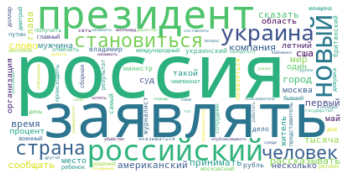

In [14]:
from wordcloud import *
word_freq = [i for i in fd.most_common(100)]
wd = WordCloud(background_color='white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
tokens_by_topic = []
for topic in df['class'].unique():
    tokens = []
    sample = df[df['class'] == topic]
    for i in range(len(sample)):
        tokens += sample.text.iloc[i].split()
    tokens_by_topic.append(tokens)

In [16]:
df['class'].unique()

array(['Спорт', 'Силовые структуры', 'Ценности', 'Бывший СССР', 'Россия',
       'Экономика', 'Интернет и СМИ', 'Наука и техника', 'Культура',
       'Из жизни', 'Мир', 'Путешествия'], dtype=object)

In [17]:
event_id = 6
df['class'].unique()[event_id]

'Интернет и СМИ'

In [18]:
%%time
import nltk
from nltk import *
N_best = 100 # число извлекаемых биграмм

bigram_mesures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграмм
finder = BigramCollocationFinder.from_words(tokens_by_topic[event_id]) # класс для хранения и извлечение биграм
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже 3 раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.raw_freq, N_best)] # выбираем топ 10 биграм по частоте
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.student_t, N_best)] # выбираем топ 10 биграм по категориям
pmi_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.pmi, N_best)]
llr_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.likelihood_ratio, N_best)]
chi2_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.chi_sq, N_best)]

CPU times: total: 0 ns
Wall time: 5 ms


In [19]:
rankings = pd.DataFrame({'chi2': chi2_ranking, 'llr': llr_ranking, 't-score': tscore_ranking, 'pmi': pmi_ranking, 'raw': raw_freq_ranking})
rankings = rankings[['raw', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

,raw,pmi,t-score,chi2,llr
0,аркадий бабченко,риа новость,аркадий бабченко,организация покушение,аркадий бабченко
1,журналист аркадий,организация покушение,журналист аркадий,аркадий бабченко,организация покушение
2,пользователь сеть,подозреваемый организация,пользователь сеть,риа новость,журналист аркадий
3,организация покушение,аркадий бабченко,организация покушение,подозреваемый организация,риа новость
4,российский журналист,убийство российский,российский журналист,убийство российский,подозреваемый организация
5,борис герман,борис герман,риа новость,журналист аркадий,пользователь сеть
6,подозреваемый организация,российский журналист,подозреваемый организация,борис герман,российский журналист
7,риа новость,журналист аркадий,убийство российский,российский журналист,убийство российский
8,убийство российский,пользователь сеть,борис герман,пользователь сеть,борис герман


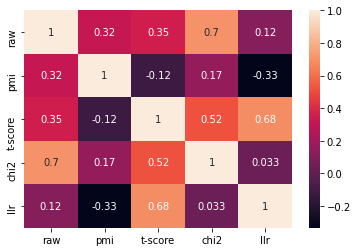

In [20]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline

corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings));

### TextRank

In [21]:
%%time
import warnings
warnings.filterwarnings('ignore')

from gensim.summarization import keywords
text = ' '.join(tokens_by_topic[event_id])
kw = keywords(text)

CPU times: total: 2.27 s
Wall time: 2.55 s


In [22]:
rankings = pd.DataFrame({'Text Rank': kw.split('\n')})
rankings.head(10)

,Text Rank
0,пользователь
1,становиться
2,украина
3,журналист
4,молодои девушка
5,сеть принимать
6,каждыи человек
7,несколько
8,форма
9,заявлять


### RAKE

* Кандидаты-фразы - все слова между разделителями и стоп-словами и знаками пунктуации
* Оценка кандидата-фразы $p:  \frac{deg(p)}{freq(p)}$
* Ограничение по частоте и количеству слов в кандидате-фразе <br>
Для **RAKE** нужны сырые тексты со стоп-словами

In [23]:
raw_df  = pd.read_csv('datasets/nlp/lenta.csv', index_col=False)
raw_df.text = raw_df.text.str.lower()
raw_df.text = raw_df.text.apply(words_only)
raw_df.text = raw_df.text.apply(lemmatize)

In [95]:
text = ' '.join(raw_df[raw_df['class'] == raw_df['class'].unique()[event_id]].text.tolist())

In [109]:
from rake_nltk import Rake
r = Rake(language='Russian')
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()
kp = [i[0] for i in r.get_ranked_phrases_with_scores()]
rankings = pd.DataFrame({'RAKE': kp})
rankings.head(10)

,RAKE
0,390.889474
1,162.185578
2,153.333333
3,148.837886
4,135.266667
5,121.416667
6,113.516667
7,109.500000
8,104.466667
9,103.156140


In [111]:
# r.stopwords

### Мера контрасности $tf-idf$

Частота терма (**term frequency**) [Luhn, 1957]: Важность терма пропорциональна его частоте.

Обратная документная частота (**inverted document frequency**) [Spaerck John, 1972]: Специфичность терма в тексте обратно пропорциональна числу текстов, 
в которых терм встерчается.

$tf idf(term, text, collection) = tf(term, document)\times idf(term, collection)$ 

Самая популярная комбинация весов $f_{t,d}\times log\frac {|D|} {n_1 + 1}$


Извлекаем ключевые слова по $tf-idf:$

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0)
tfidf_matrix = tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names()
tfidf_ranking = []
dense = tfidf_matrix.todense()

text = dense[event_id].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking.append(phrase)

Результаты:

In [112]:
rankings = pd.DataFrame({'tf-idf': tfidf_ranking})
rankings.head(10)

,tf-idf
0,пользователь
1,бабченко
2,девушка
3,журналист
4,украина
5,аркадий
6,герман
7,сеть
8,подписчик
9,человек


### Natasha

Natasha - Библиотека для поиска именованных сущностей (Named-entity recognition) из текстов на русском языке. На данный 
момент разюираются упоминания персон, даты и суммы денег.

In [149]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

In [154]:
text = 'По Нижнем Новгородом пепедали Нижнему Новгороду передали 100 евро'

morph_vocab = MorphVocab()
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '
doc = Doc(text)


### Векторная модель

Колсинусная мера близости в векторной модели [Salton et. al, 1975]: $cos(d_i,d_j) = \frac{d_i\times d_j}{||d_i|||d_j||} = \frac{\sum_k f_{ki}\times f_{kj}}{\sqrt{(\sum_k{f_{ki}})^2}\sqrt{(\sum_k{f_{ki}})^2}}$

Если вектора нормировать $||d_i||=||d_j||=1, cos(d_i,d_j)=d_i\times d_j$